In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [39]:
img = cv2.imread('water.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,cv2.THRESH_BINARY_INV)

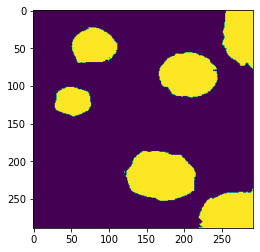

In [40]:
plt.imshow(thresh)

In [41]:
fg = cv2.erode(thresh,None,iterations = 2)

In [42]:
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,128,1)

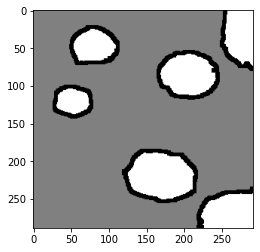

In [43]:
marker = cv2.add(fg,bg)
plt.imshow(marker, cmap ="gray")

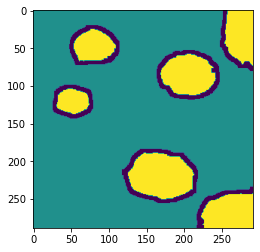

In [44]:
marker32 = np.int32(marker)
plt.imshow(marker32)

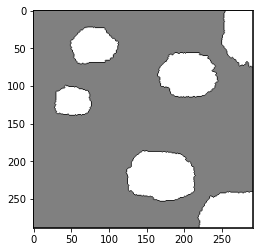

In [45]:
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
plt.imshow(m, cmap ="gray")

In [83]:
marker32 = cv2.watershed(img,marker32)
img[marker32 == -1] = [255,255,255]

In [84]:
img2 = cv2.imread('water.jpg')
kernel = np.ones((20,20),np.uint8)
grad = cv2.morphologyEx(img2,cv2.MORPH_GRADIENT,kernel)
ret,thresh = cv2.threshold(gray,70,255,cv2.THRESH_BINARY_INV)
marker32 = cv2.watershed(grad,marker32)

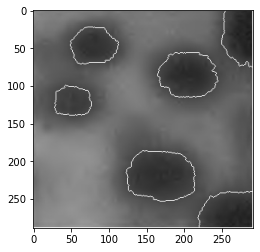

In [85]:
plt.imshow(img)

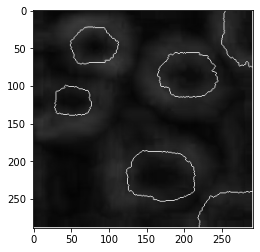

In [86]:
grad[marker32 == -1] = [255,255,255]
plt.imshow(grad)